## Title - Analyse a data set which contains traits of the players alnog with their different skills in the field.
The goal of our analysis is to categorize similar players using their traits and their different skills in the field.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('players_20.csv')
df.shape

(18278, 104)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [4]:
df.columns.values

array(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall',
       'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'mo

### Features 

**Player_positions**

-  LF, ST, RS **(Striker)**<br>
-  LW, LF, CF, RF, RW **(Center Forward - Wing Forward)**<br>
-  IAM, CAM, RAM **(Attacking Midfielder)**<br>
-  LM, LCM, CM, RCM, RM **(Center Midfielder - Wing Midfielder)**<br>
-  LWB, LDM, CDM, RDM, RWB **(Defensive Midfielder - Wing Back)**<br>
-  LB, LCB, CB, RCB, RB **(Center Back - Full Back)**<br>

![Player_posn](https://www.guidetofootball.com/wp-content/uploads/playing-positions.png)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [6]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

In [7]:
k=df.isnull().sum()
null_col=df.isnull().sum().loc[k>0]
null_col.sort_values(ascending=False)

loaned_from             17230
nation_jersey_number    17152
nation_position         17152
player_tags             16779
gk_positioning          16242
gk_diving               16242
gk_reflexes             16242
gk_speed                16242
gk_handling             16242
gk_kicking              16242
player_traits           10712
cm                       2036
rcm                      2036
lcm                      2036
lm                       2036
ram                      2036
rs                       2036
rm                       2036
lam                      2036
lwb                      2036
ldm                      2036
cdm                      2036
rdm                      2036
rwb                      2036
lb                       2036
lcb                      2036
cb                       2036
rcb                      2036
cam                      2036
rb                       2036
rw                       2036
physic                   2036
pace                     2036
shooting  

We can see that there are some features having more than 80% null values.<br>
Let's apply the condition to drop such features.

In [8]:
d_col=df.isnull().sum().loc[k>15000].index.to_list()
d_col

['player_tags',
 'loaned_from',
 'nation_position',
 'nation_jersey_number',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning']

In [9]:
df.drop(d_col,axis=1,inplace=True)
df.shape

(18278, 94)

In [10]:
df.isnull().sum().loc[k>0]

release_clause_eur       1298
team_position             240
team_jersey_number        240
joined                   1288
contract_valid_until      240
pace                     2036
shooting                 2036
passing                  2036
dribbling                2036
defending                2036
physic                   2036
player_traits           10712
ls                       2036
st                       2036
rs                       2036
lw                       2036
lf                       2036
cf                       2036
rf                       2036
rw                       2036
lam                      2036
cam                      2036
ram                      2036
lm                       2036
lcm                      2036
cm                       2036
rcm                      2036
rm                       2036
lwb                      2036
ldm                      2036
cdm                      2036
rdm                      2036
rwb                      2036
lb        

Let's drop some irrelevent feature 

In [11]:
df.drop(['sofifa_id','player_url','dob','real_face','long_name'],axis=1,inplace=True)

In [12]:
df.shape

(18278, 89)

In [13]:
df.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,195800000.0,RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,96500000.0,LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,195200000.0,CAM,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,164700000.0,GK,13.0,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,184500000.0,LW,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


### Univariate & Bi-variate analysis

**Nationality**

Let's findout top 10 countries on the basis of players count

In [14]:
df['nationality'].value_counts().head(10)

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

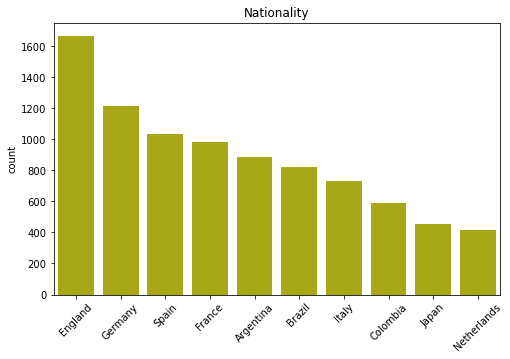

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['nationality'].value_counts()[0:10].keys(),y=df['nationality'].value_counts()[0:10],color="y")
plt.title('Nationality')
plt.ylabel('count')
plt.xticks(rotation=45) 
plt.show()

Obervations:<br>
Maxixmum players are from **England** followed by **Germany & Spain**

**Height**

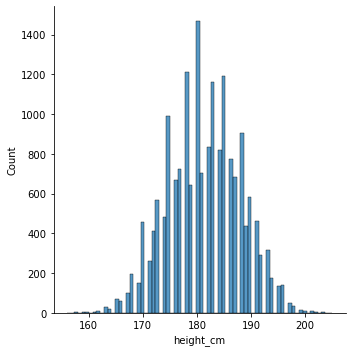

In [16]:
sns.displot(data=df,x='height_cm',)
plt.show()

Obervations:<br>
Distribution of 'Player Heights' data seems to be **normally distributed.**<br>
Most of the players height is ranging in between **175 to 190 cm.**

**Age**

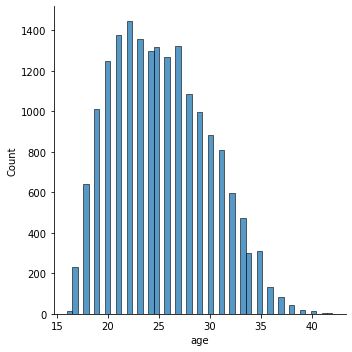

In [17]:
sns.displot(data=df,x='age',)
plt.show()

Obervations:<br>
Distribution of 'Age' data seems to be **right skewed**.<br>
Let's do the further analysis on the age data by dividing it on the age-group basis.

In [18]:
# players based on age group

age20=df[df['age']<=20]   # players having age less than or equal to 20 years
age20_35=df[(df['age']>20) & (df['age']<=35)]  # players having age greater than 20 & less than or equal to 35 years
age35=df[df['age']>35]    # players having age more than or equal to 35 years

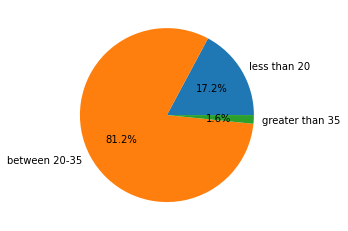

In [19]:
x=list([age20.shape[0],age20_35.shape[0],age35.shape[0]])
labels=['less than 20', 'between 20-35', 'greater than 35']
plt.pie(x,labels=labels,autopct='%.1f%%')
plt.show()

Obervations:<br>
We can clearly observe that **80%** of the players are from **age group 20 to 35 years** .<br>
Only 1.5% of the players are above 35 years, which is very much obvious.

**Wage**

Let's find out top 10 players on the basis of their wage

In [20]:
players_wage=df[['short_name','wage_eur']].sort_values(by='wage_eur',ascending=False).head(10)
players_wage

,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000
19,L. Suárez,355000
8,L. Modrić,340000
36,T. Kroos,330000
17,S. Agüero,300000
21,Sergio Busquets,300000


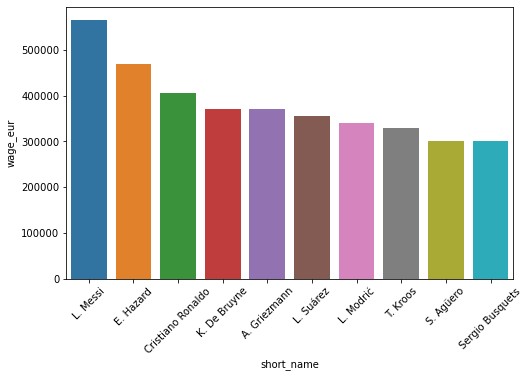

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x=players_wage['short_name'],y=players_wage['wage_eur'])
plt.xticks(rotation=45) 
plt.show()

**L.Messi** is having the highest wage(in euros) followed by **E.Hazard & C.Ronaldo**

**Preffered foot**

In [22]:
df['preferred_foot'].value_counts()

Right    13960
Left      4318
Name: preferred_foot, dtype: int64

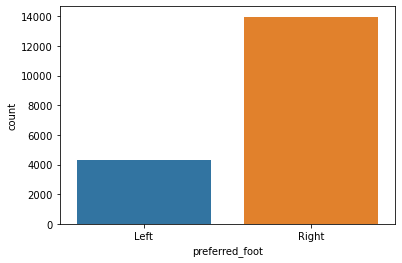

In [23]:
sns.countplot(x=df['preferred_foot'])
plt.show()

Obervations:<br>
We can clearly observe that approx **80%** of the players are having **'Right foot' as their preffered foot** .<br>

### Let's apply one condition to reduce the number of rows to be analysed.
We are going to analyse the data only for the players whose **'overall' is greater than 70.**

In [24]:
df_top=df[df['overall']>70]

In [25]:
df_top.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,195800000.0,RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,96500000.0,LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,195200000.0,CAM,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,164700000.0,GK,13.0,2014-07-16,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,184500000.0,LW,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [26]:
df_top.shape

(4756, 89)

Let's check the null values in the dataset

In [27]:
df_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4756 entries, 0 to 4755
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  4756 non-null   object 
 1   age                         4756 non-null   int64  
 2   height_cm                   4756 non-null   int64  
 3   weight_kg                   4756 non-null   int64  
 4   nationality                 4756 non-null   object 
 5   club                        4756 non-null   object 
 6   overall                     4756 non-null   int64  
 7   potential                   4756 non-null   int64  
 8   value_eur                   4756 non-null   int64  
 9   wage_eur                    4756 non-null   int64  
 10  player_positions            4756 non-null   object 
 11  preferred_foot              4756 non-null   object 
 12  international_reputation    4756 non-null   int64  
 13  weak_foot                   4756 

Let's check the statistics for the numerical features:

In [28]:
df_top.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4.756000e+03,4756.000000,4756.000000,4756.000000,4756.000000,4.405000e+03,4659.000000,4659.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4316.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000
mean,27.502733,181.675147,76.460892,74.939655,77.299622,7.767055e+06,27346.930193,1.369218,3.133516,2.772288,1.510398e+07,16.871861,2021.445160,69.907090,61.264829,66.083874,70.320667,58.070204,70.299815,58.254205,54.047729,59.440706,67.692178,51.813919,64.313499,57.126156,51.134777,61.882044,67.678722,67.445963,67.626577,67.705635,71.818966,65.579268,67.824432,68.627208,69.143398,69.861648,56.986964,64.019975,54.118797,58.868797,62.892136,55.383516,69.292893,53.769554,53.889193,51.003995,16.640034,16.425988,16.234441,16.552355,16.753364
std,4.017547,6.842299,7.162757,3.673753,4.647445,9.022708e+06,35909.049632,0.654300,0.715785,0.872333,1.791861e+07,15.436072,1.292441,12.284591,13.475976,8.730305,9.025549,17.747343,8.257839,19.050531,20.475484,18.234264,13.736390,19.361427,18.867436,19.539312,19.262865,14.411183,16.125422,14.555591,14.216908,14.247976,5.571127,14.527765,11.516718,11.842802,14.877588,11.540401,19.780760,17.001287,22.009002,20.527451,13.352943,16.522581,8.894486,21.555882,23.414846,23.553027,19.209913,18.307359,17.661305,18.796133,19.615568
min,17.000000,157.000000,56.000000,71.000000,71.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,3.000000e+05,1.000000,2019.000000,29.000000,15.000000,34.000000,34.000000,18.000000,35.000000,6.000000,5.000000,7.000000,11.000000,5.000000,7.000000,6.000000,4.000000,9.000000,5.000000,15.000000,16.000000,14.000000,54.000000,20.000000,15.000000,29.000000,13.000000,26.000000,5.000000,11.000000,7.000000,3.000000,10.000000,9.000000,17.000000,7.000000,7.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25.000000,177.000000,71.000000,72.000000,74.000000,3.000000e+06,9000.000000,1.000000,3.000000,2.000000,5.400000e+06,7.000000,2020.000000,63.000000,53.000000,61.000000,66.000000,40.000000,66.000000,49.000000,40.000000,52.000000,66.000000,38.000000,60.000000,46.000000,37.000000,57.000000,66.000000,59.000000,60.000000,60.000000,68.000000,57.000000,60.000000,62.000000,65.000000,63.000000,47.000000,55.000000,33.000000,50.000000,56.000000,45.000000,65.000000,35.000000,32.000000,27.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,27.000000,182.000000,76.000000,74.000000,76.000000,5.000000e+06,18000.000000,1.000000,3.000000,3.000000,9.500000e+06,13.000000,2021.000000,71.000000,65.000000,68.000000,72.000000,66.000000,71.000000,65.000000,60.000000,64.000000,71.000000,56.000000,71.000000,63.000000,54.000000,65.000000,72.000000,69.000000,70.000000,70.000000,72.000000,68.000

In [29]:
num_features=df_top.describe().columns
num_features

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'team_jersey_number', 'contract_valid_until',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'def

In [30]:
df_top1=df_top[num_features]

Out of the above features **'team_jersey_number', 'contract_valid_until'** are not having much of importance, so we will drop them going forward.

In [31]:
df_top1=df_top1.drop(['team_jersey_number', 'contract_valid_until'],axis=1)

In [32]:
df_top1.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,NaN,NaN,NaN,NaN,NaN,NaN,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


### Going forward we will use only this dataframe with numrical only features for our further analysis.

In [33]:
df_top1.isnull().sum()

age                             0
height_cm                       0
weight_kg                       0
overall                         0
potential                       0
value_eur                       0
wage_eur                        0
international_reputation        0
weak_foot                       0
skill_moves                     0
release_clause_eur            351
pace                          440
shooting                      440
passing                       440
dribbling                     440
defending                     440
physic                        440
attacking_crossing              0
attacking_finishing             0
attacking_heading_accuracy      0
attacking_short_passing         0
attacking_volleys               0
skill_dribbling                 0
skill_curve                     0
skill_fk_accuracy               0
skill_long_passing              0
skill_ball_control              0
movement_acceleration           0
movement_sprint_speed           0
movement_agili

### Imputation

Let's impute the null values by the mean values:

In [34]:
df_top1['release_clause_eur']=df_top1['release_clause_eur'].fillna(df_top['release_clause_eur'].mean())
df_top1['pace']=df_top1['pace'].fillna(df_top['pace'].mean())
df_top1['shooting']=df_top1['shooting'].fillna(df_top['shooting'].mean())
df_top1['passing']=df_top1['passing'].fillna(df_top['passing'].mean())
df_top1['dribbling']=df_top1['dribbling'].fillna(df_top['dribbling'].mean())
df_top1['defending']=df_top1['defending'].fillna(df_top['defending'].mean())
df_top1['physic']=df_top1['physic'].fillna(df_top['physic'].mean())

In [35]:
df_top1.shape

(4756, 51)

In [36]:
df_top1.values

array([[ 32., 170.,  72., ...,  15.,  14.,   8.],
       [ 34., 187.,  83., ...,  15.,  14.,  11.],
       [ 27., 175.,  68., ...,  15.,  15.,  11.],
       ...,
       [ 29., 178.,  79., ...,  12.,  13.,   8.],
       [ 30., 182.,  77., ...,   9.,  11.,   7.],
       [ 28., 184.,  81., ...,  10.,  14.,   7.]])

We can notice that the features are on different scales,we will use **MinMaxScaler** scaling technique on the data.

In [37]:
from sklearn.preprocessing import MinMaxScaler

x=df_top1.values
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_norm=pd.DataFrame(x_scaled)

### PCA

Let's apply PCA to reduce dimensionality of the data from 51 features to 2 features so that we can plot them to visualise the cluster formation.

In [38]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
reduced=pd.DataFrame(pca.fit_transform(x_norm))

 We choose to use a K-Means clustering algorithm to identify clusters in the data

### K-Means Cluster

Before applying K-means, let's findout probable no. of clusters i.e K-value.<br>
We are going to use Elbow method to find out the same.

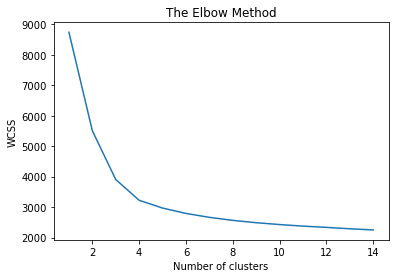

In [39]:
from sklearn.cluster import KMeans
wcss=[]   # within cluster sum of squares
for i in range (1,15):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(x_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can take k=4

In [40]:
model = KMeans(n_clusters=4, random_state=10)
model.fit(reduced)

KMeans(n_clusters=4, random_state=10)

In [41]:
labels=model.labels_

In [42]:
centroid=model.cluster_centers_
centroid

array([[-0.45389385,  0.30177802],
       [ 2.50825882, -0.50864296],
       [ 0.31595388,  0.9047513 ],
       [-0.38345576, -0.66804057]])

In [43]:
reduced['cluster']=labels
reduced['name']=df_top['short_name'].to_list()
reduced.columns=['x','y','cluster','name']

In [44]:
reduced.head()

,x,y,cluster,name
0,-1.454602,-1.192041,3,L. Messi
1,-1.249654,-1.073172,3,Cristiano Ronaldo
2,-1.362775,-1.358351,3,Neymar Jr
3,2.408226,-0.537928,1,J. Oblak
4,-1.250154,-1.180217,3,E. Hazard


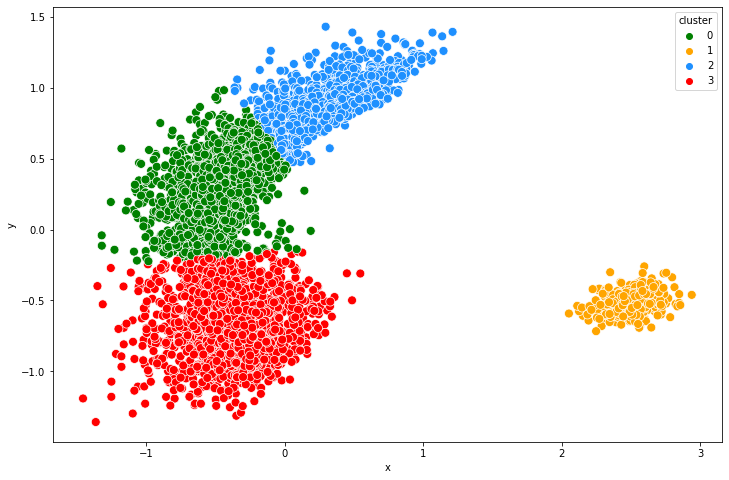

In [45]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='x',y='y',data=reduced,hue='cluster', palette=['green','orange','dodgerblue','red'],s=80)
plt.show()

Let's add the cluster column to the original dataframe for the further analsysis.

In [46]:
df_top1['cluster']=reduced['cluster']

In [47]:
df_top1.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,cluster
0,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,87.00000,92.000000,92.000000,96.000000,39.000000,66.000000,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,3
1,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,90.00000,93.000000,82.000000,89.000000,35.000000,78.000000,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,3
2,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,91.00000,85.000000,87.000000,95.000000,32.000000,58.000000,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,3
3,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,69.90709,61.264829,66.083874,70.320667,58.070204,70.299815,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,1
4,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,91.00000,83.000000,86.000000,94.000000,35.000000,66.000000,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,3


Let's devide the dataframe on the basis of the cluster we get.

### Clusters

In [48]:
cluster0=df_top1[df_top1['cluster']==0]
cluster1=df_top1[df_top1['cluster']==1]
cluster2=df_top1[df_top1['cluster']==2]
cluster3=df_top1[df_top1['cluster']==3]

In [49]:
cluster0.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,cluster
7,27,193,92,90,91,78000000,200000,3,3,2,150200000.0,77.0,60.0,70.0,71.0,90.0,86.0,53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,13,10,13,11,11,0
8,33,172,66,90,90,45000000,340000,4,4,4,92300000.0,74.0,76.0,89.0,89.0,72.0,66.0,86,72,55,92,76,87,85,78,88,92,77,71,92,89,93,79,68,85,58,82,62,82,79,91,82,92,68,76,71,13,9,7,14,9,0
15,28,168,72,89,90,66000000,235000,3,3,2,130400000.0,78.0,65.0,77.0,81.0,87.0,83.0,68,65,54,86,56,79,49,49,81,80,79,77,82,93,92,71,77,97,73,63,90,92,72,79,54,85,90,91,85,15,12,10,7,10,0
18,33,184,82,89,89,31500000,300000,4,3,3,64600000.0,72.0,68.0,75.0,73.0,87.0,85.0,66,63,92,80,69,65,74,72,83,83,74,71,78,87,66,79,93,80,85,62,90,88,67,71,86,84,85,87,90,11,8,9,7,11,0
21,30,189,76,89,89,55000000,300000,4,3,3,112800000.0,42.0,62.0,80.0,80.0,85.0,80.0,62,67,68,89,44,80,66,68,82,88,40,43,67,87,49,61,66,86,77,54,85,89,77,86,60,93,90,86,80,5,8,13,9,13,0


Let's take the mean of all the features within the cluster, so that we can compare them.

In [50]:
C0=cluster0.mean()
C1=cluster1.mean()
C2=cluster2.mean()
C3=cluster3.mean()

In [51]:
col=df_top1.columns.to_list() # list of columns in the dataframe 

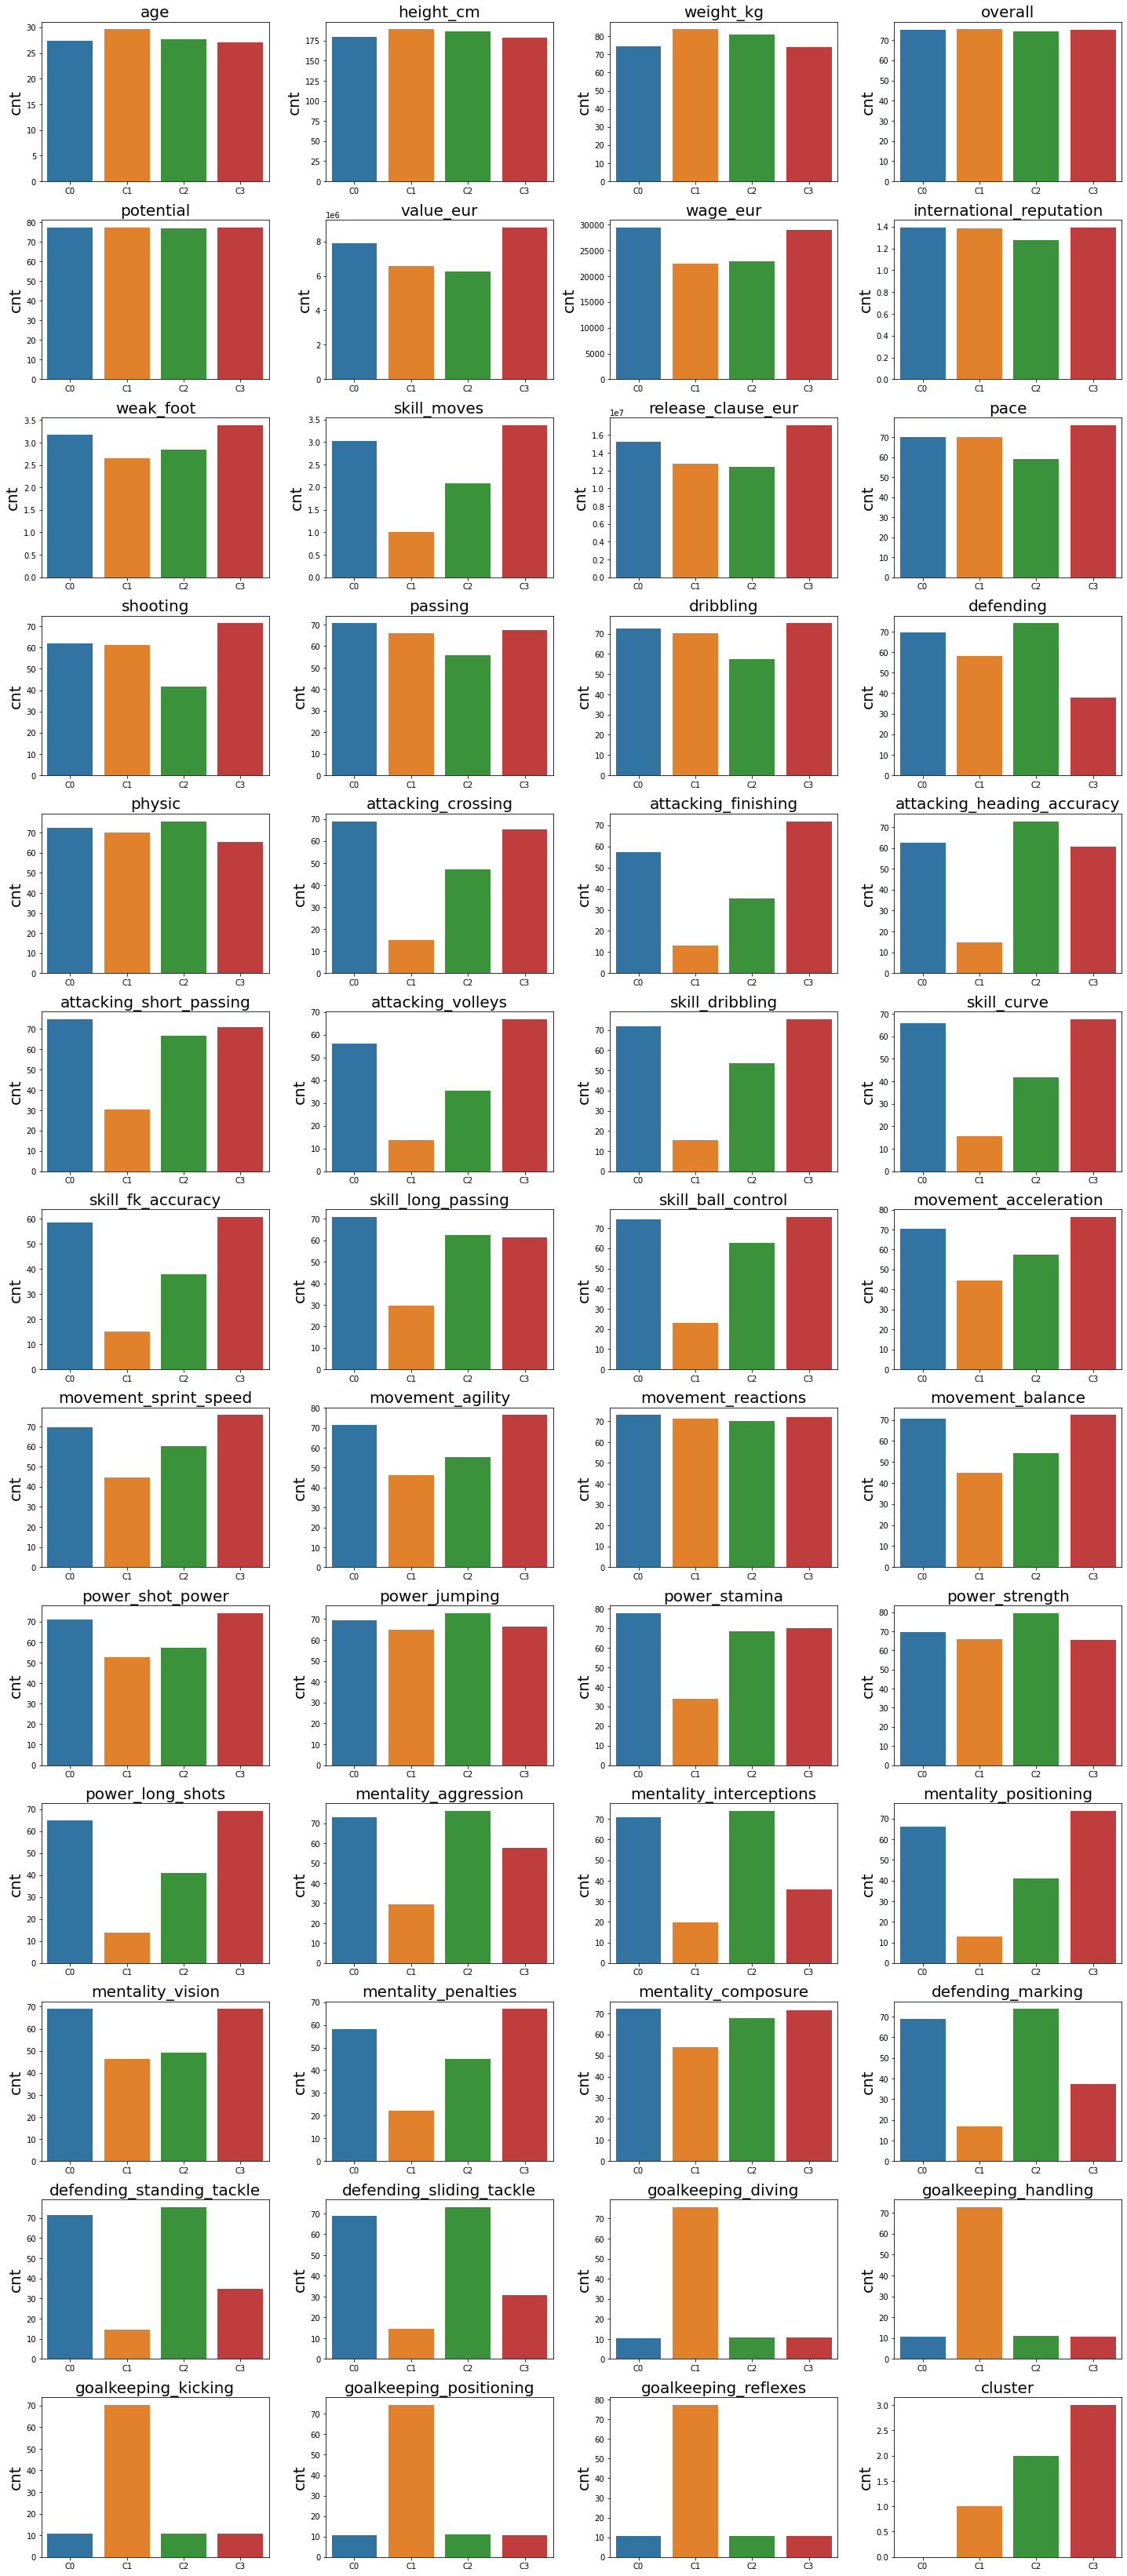

In [52]:
plt.figure(figsize=(20,70), facecolor='white')#To set canvas 
plotnumber = 1 #counter

for column in col: #accessing the columns 
    if plotnumber<=90 :
        ax = plt.subplot(20,4,plotnumber)#plotting 8 graph
        sns.barplot(x=['C0','C1','C2','C3'],y=[C0[column],C1[column],C2[column],C3[column]])
        plt.title(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('cnt',fontsize=20)
    plotnumber+=1 #counter increment
plt.tight_layout()

By analysing the plots above, we can interpret the following:<br>
We will make a list of important features for each individual cluster

In [53]:
C0_features = ['skill_moves','passing','dribbling','attacking_crossing','attacking_short_passing','skill_dribbling',\
               'skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_balance',\
               'power_shot_power','power_stamina','power_long_shots','mentality_vision','mentality_composure']

C1_features = ['goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning',\
                       'goalkeeping_reflexes']

C2_features = ['defending','defending_marking','defending_standing_tackle','defending_sliding_tackle','attacking_heading_accuracy'\
               'power_strength','mentality_aggression','mentality_interceptions']

C3_features = ['skill_moves','pace','shooting','dribbling','attacking_finishing','attacking_volleys','movement_acceleration',\
               'movement_sprint_speed','movement_agility','power_shot_power','power_long_shots','mentality_positioning',\
               'mentality_penalties','movement_balance']

By looking at the feature set for each individual cluster, we can conclude that clusters are been made bascially on the playing positions & the players skill set.
- **C0_features** - Most of the features represent the skills shown by **Midfielder's**
- **C1_features** - Most of the features represent the skills shown by **Goalkeeper's**
- **C2_features** - Most of the features represent the skills shown by **Defender's**
- **C3_features** - Most of the features represent the skills shown by **Striker's**

Let's plot the clusters for one final time along with thier nomenclature.

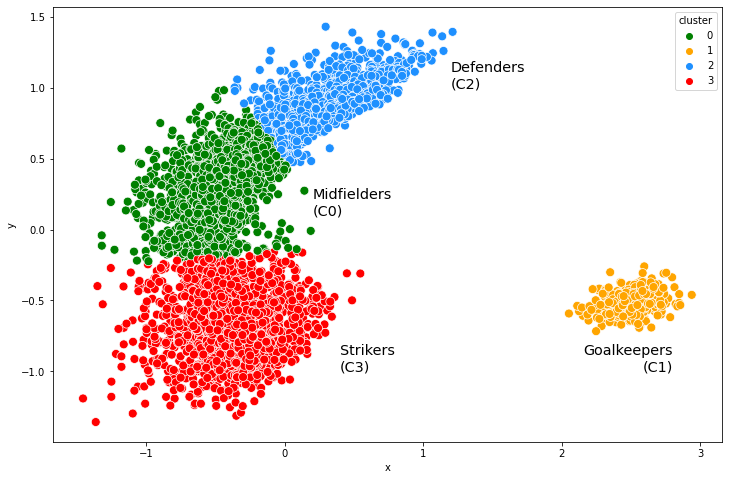

In [54]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='x',y='y',data=reduced,hue='cluster', palette=['green','orange','dodgerblue','red'],s=80)
plt.text(0.4, -1,'Strikers\n(C3)',horizontalalignment='left', size='x-large', color='black')
plt.text(0.2, 0.1,'Midfielders\n(C0)',horizontalalignment='left', size='x-large', color='black')
plt.text(1.2, 1,'Defenders\n(C2)',horizontalalignment='left', size='x-large', color='black')
plt.text(2.8, -1,'Goalkeepers\n(C1)',horizontalalignment='right', size='x-large', color='black')
plt.show()

## Conclusion:

We found that, the clusters of the players are mainly on the basis of their **playing positions & the skills** they have. 

It appears that from the results above, the clusters are separated by the four main playing positions in the game.

- **Midfielders** (Green cluster or Cluster 0)
- **Goalkeepers** (Yellow cluster or Cluster 1)
- **Defenders** (Blue cluster or Cluster 2)
- **Strikers** (Red cluster or Cluster 3)